# ✈️ Customer Comment Dataset Summary

This dataset contains **customer feedback** related to **airline flights**, focusing primarily on **food and beverage services**.  
It includes **flight details**, **customer information**, and **verbatim comments** along with **sentiment analysis** results.

---

## 📊 Overview

Each record represents a single customer's feedback for a specific flight, including:

- Flight information (number, origin, destination, etc.)
- Customer and loyalty details
- Aircraft and operational details
- The customer’s comment and its analyzed sentiment

---

## 🧾 Column Descriptions

| **Column Name** | **Description** |
|------------------|-----------------|
| **flight_number** | Unique identification number for each flight. |
| **origin_station_code** | Three-letter airport code for the **departure airport** (e.g., `LHX`). |
| **destination_station_code** | Three-letter airport code for the **arrival airport** (e.g., `SFX`). |
| **scheduled_departure_date** | Scheduled date of flight departure. |
| **arrival_delay_group** | Category describing **arrival status** (e.g., *Early & On-time*, *Delayed*). |
| **departure_delay_group** | Category describing **departure status** (e.g., *Early & On-time*, *Delayed*). |
| **entity** | Airline’s **geographical region** or **operational division** (e.g., *Atlantic*, *Domestic*). |
| **verbatim_text** | Raw **customer feedback**, written in the customer’s own words. |
| **seat_factor_band** | Category representing **flight occupancy** (e.g., *0–70*, *90+*). |
| **ques_verbatim_text** | The **survey question** the customer was responding to. |
| **loyalty_program_level** | Customer’s **loyalty tier** (e.g., *Non-Elite*, *Premier Platinum*). |
| **fleet_type_description** | Aircraft model used for the flight (e.g., *B777-200*, *A320-200*). |
| **fleet_usage** | Operational category of the aircraft (e.g., *Mainline*, *Express*). |
| **response_group** | Category indicating whether the respondent is a **loyalty program member** (e.g., *Member*, *Non-Member*). |
| **sentiments** | **Overall sentiment** of the comment (*Positive*, *Negative*, or *Neutral*). |
| **transformed_text** | **Processed version** of the customer’s feedback (e.g., lowercased, cleaned, stop words removed) for text analysis. |

---


# Loading the csv file into a dataframe

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passangers-booking-data/AirlineScrappedReview.csv
/kaggle/input/airline-passangers-booking-data/Customer_comment.csv
/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv
/kaggle/input/airline-passangers-booking-data/Survey data_Inflight Satisfaction Score.csv


In [2]:
customer_comments_df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Customer_comment.csv')
display(customer_comments_df.head())

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


# Data exploration

In [3]:
num_rows = customer_comments_df.shape[0]
print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 9424


In [55]:
# Count the total number of duplicate rows
duplicate_count = customer_comments_df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [4]:
num_unique_flights = customer_comments_df['flight_number'].nunique()
print(f"The number of unique flight numbers in the dataset is: {num_unique_flights}")

The number of unique flight numbers in the dataset is: 3001


In [5]:
null_values_per_column = customer_comments_df.isnull().sum()
print("Number of null values in each column:")
print(null_values_per_column)

Number of null values in each column:
Unnamed: 0                     0
flight_number                  0
origin_station_code            0
destination_station_code       0
scheduled_departure_date       0
arrival_delay_group            0
departure_delay_group          0
entity                         0
verbatim_text                  0
seat_factor_band               0
ques_verbatim_text             0
loyalty_program_level       2504
fleet_type_description         0
fleet_usage                    0
response_group                 0
sentiments                     0
transformed_text            1019
dtype: int64


In [6]:
categorical_cols = customer_comments_df.select_dtypes(include='object').columns
categorical_df = customer_comments_df[categorical_cols]
display(categorical_df.head())

,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


In [7]:
col = 'verbatim_text'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: verbatim_text
Value Counts:


verbatim_text
No.                                                                                                                 774
no.                                                                                                                 139
None.                                                                                                                82
N/A.                                                                                                                 38
Nothing.                                                                                                             20
                                                                                                                   ... 
The Scotch offered was not as advertised (a lower quality blend vs a single malt advertised).                         1
I wanted to have a diet coke and the flight attendants told me that they were not available, kind of surprising.      1
Attendant brought me water

Number of unique values: 8013


In [8]:
col = 'seat_factor_band'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: seat_factor_band
Value Counts:


seat_factor_band
90+        6302
80+        1639
70+         786
0 to 70     697
Name: count, dtype: int64

Number of unique values: 4


In [9]:
col = 'ques_verbatim_text'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: ques_verbatim_text
Value Counts:


ques_verbatim_text
Is there anything else you'd like to share about the food & beverage served on your flight from [CITY] to [CITY]?    9424
Name: count, dtype: int64

Number of unique values: 1


In [10]:
col = 'loyalty_program_level'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: loyalty_program_level
Value Counts:


loyalty_program_level
non-elite           4128
premier silver       874
premier 1k           722
premier gold         604
premier platinum     451
global services      140
NBK                    1
Name: count, dtype: int64

Number of unique values: 7


In [11]:
col = 'fleet_type_description'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: fleet_type_description
Value Counts:


fleet_type_description
B737-900     1451
B737-800     1133
B777-200      882
ERJ-175       714
A320-200      640
A319-100      620
B787-9        490
B777-300      457
B737-MAX9     430
B767-300      386
CRJ-200       315
B737-700      282
B757-200      259
B787-10       257
B787-8        220
B767-400      186
B737-MAX8     181
ERJ-145       135
ERJ-170       126
B757-300      111
CRJ-550        89
CRJ-700        60
Name: count, dtype: int64

Number of unique values: 22


In [12]:
col = 'fleet_usage'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: fleet_usage
Value Counts:


fleet_usage
Mainline    7985
Express     1439
Name: count, dtype: int64

Number of unique values: 2


In [13]:
col = 'response_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: response_group
Value Counts:


response_group
member        6905
non-member    2518
NBK              1
Name: count, dtype: int64

Number of unique values: 3


In [14]:
col = 'sentiments'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: sentiments
Value Counts:


sentiments
Neutral     9307
Negative     117
Name: count, dtype: int64

Number of unique values: 2


In [15]:
col = 'transformed_text'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: transformed_text
Value Counts:


transformed_text
none                                                                                                      97
good                                                                                                      69
thank                                                                                                     41
na                                                                                                        30
noth                                                                                                      27
                                                                                                          ..
appreci option order snack due premier 1k statu                                                            1
first class limit option food fanci                                                                        1
stale                                                                                                      1
ov

Number of unique values: 7609


In [16]:
col = 'origin_station_code'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: origin_station_code
Value Counts:


origin_station_code
IAX    1149
EWX    1009
DEX     942
ORX     893
SFX     720
       ... 
TKX       1
PQX       1
MHX       1
GDX       1
LRX       1
Name: count, Length: 195, dtype: int64

Number of unique values: 195


In [17]:
col = 'destination_station_code'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: destination_station_code
Value Counts:


destination_station_code
IAX    1427
EWX    1210
ORX     947
DEX     872
SFX     768
       ... 
ITX       1
TKX       1
TAX       1
GTX       1
BEX       1
Name: count, Length: 192, dtype: int64

Number of unique values: 192


In [18]:
col = 'scheduled_departure_date'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: scheduled_departure_date
Value Counts:


scheduled_departure_date
2022-09-10    399
2022-09-17    378
2022-09-24    366
2022-09-27    365
2022-09-06    346
2022-09-13    336
2022-09-04    335
2022-09-03    334
2022-09-20    330
2022-09-07    324
2022-09-09    322
2022-09-23    315
2022-09-18    314
2022-09-05    311
2022-09-01    308
2022-09-15    305
2022-09-26    305
2022-09-02    303
2022-09-12    300
2022-09-19    300
2022-09-29    298
2022-09-16    298
2022-09-14    296
2022-09-11    296
2022-09-08    295
2022-09-21    291
2022-09-22    290
2022-09-25    288
2022-09-28    281
2022-09-30    195
Name: count, dtype: int64

Number of unique values: 30


In [19]:
col = 'arrival_delay_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: arrival_delay_group
Value Counts:


arrival_delay_group
Early & Ontime    6811
Delayed           2613
Name: count, dtype: int64

Number of unique values: 2


In [20]:
col = 'departure_delay_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: departure_delay_group
Value Counts:


departure_delay_group
Early & Ontime    6241
Delayed           3183
Name: count, dtype: int64

Number of unique values: 2


In [21]:
col = 'entity'
print(f"\nColumn: {col}")
print("Value Counts:")
display(categorical_df[col].value_counts())
print(f"Number of unique values: {categorical_df[col].nunique()}")


Column: entity
Value Counts:


entity
Domestic    6593
Atlantic    1887
Latin        678
Pacific      266
Name: count, dtype: int64

Number of unique values: 4


# Data Visualization

### Origin Station Code Distribution

This pie chart shows the distribution of origin station codes. Categories contributing less than 5% have been grouped into 'Other'.

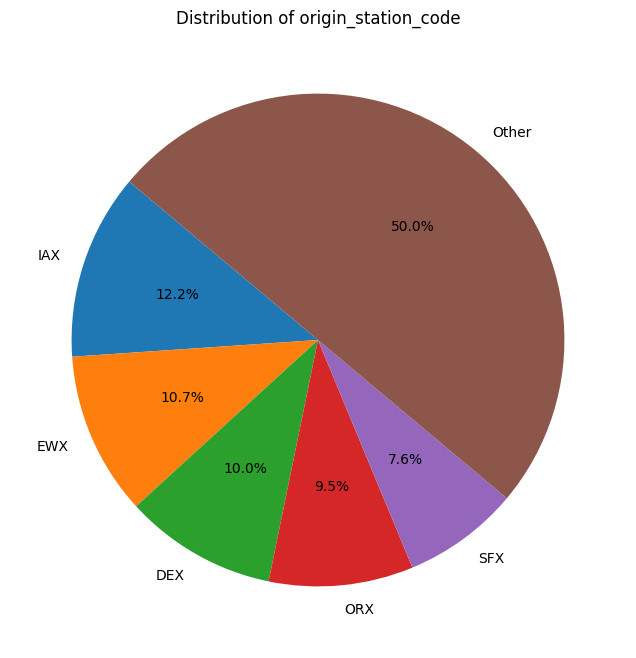

In [22]:
col = 'origin_station_code'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Destination Station Code Distribution

This pie chart shows the distribution of destination station codes. Categories contributing less than 5% have been grouped into 'Other'.

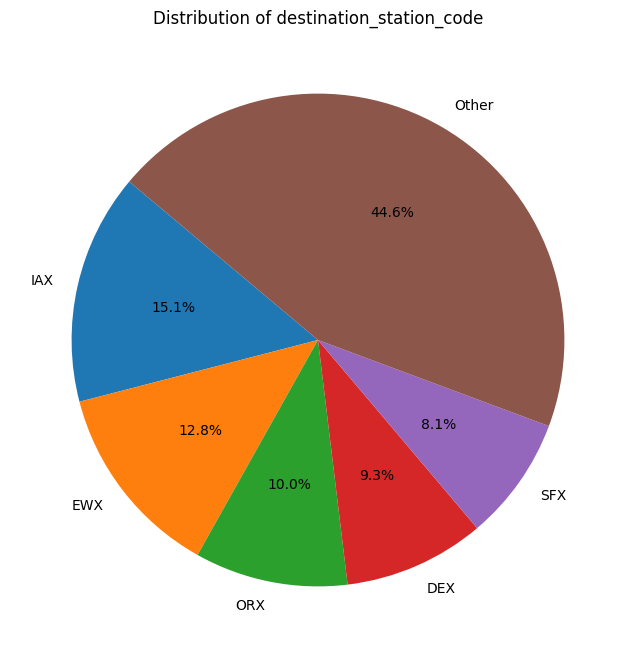

In [23]:
col = 'destination_station_code'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Arrival Delay Group Distribution

This pie chart shows the distribution of arrival delay groups. Categories contributing less than 5% have been grouped into 'Other'.

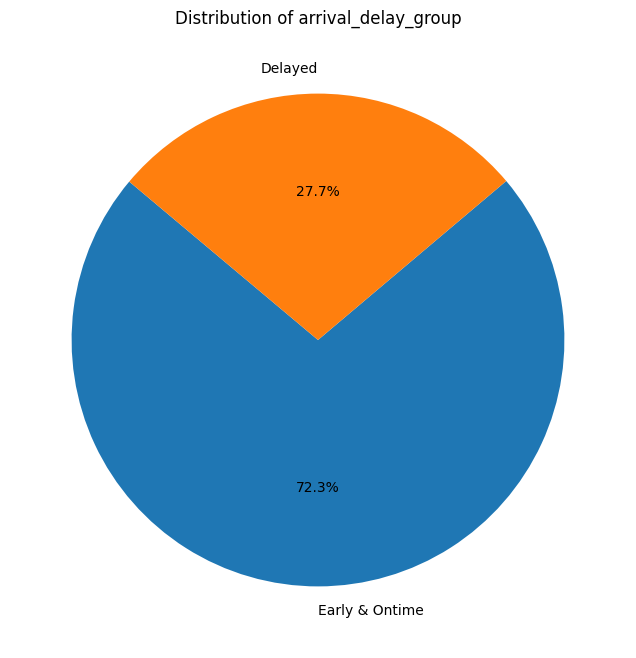

In [24]:
col = 'arrival_delay_group'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Departure Delay Group Distribution

This pie chart shows the distribution of departure delay groups. Categories contributing less than 5% have been grouped into 'Other'.

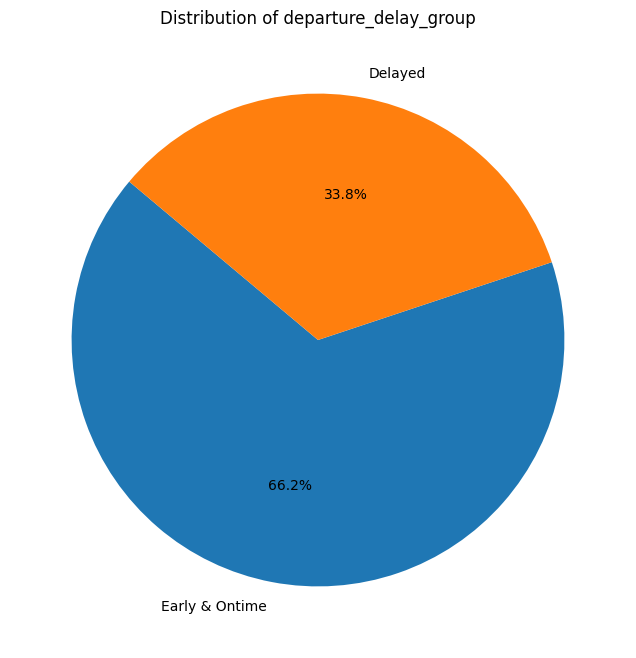

In [25]:
col = 'departure_delay_group'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Entity Distribution

This pie chart shows the distribution of entities. Categories contributing less than 5% have been grouped into 'Other'.

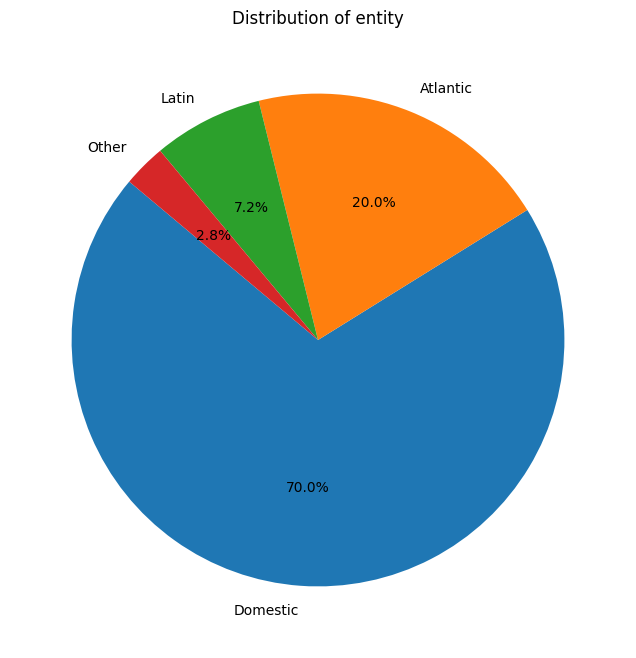

In [26]:
col = 'entity'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Seat Factor Band Distribution

This pie chart shows the distribution of seat factor bands. Categories contributing less than 5% have been grouped into 'Other'.

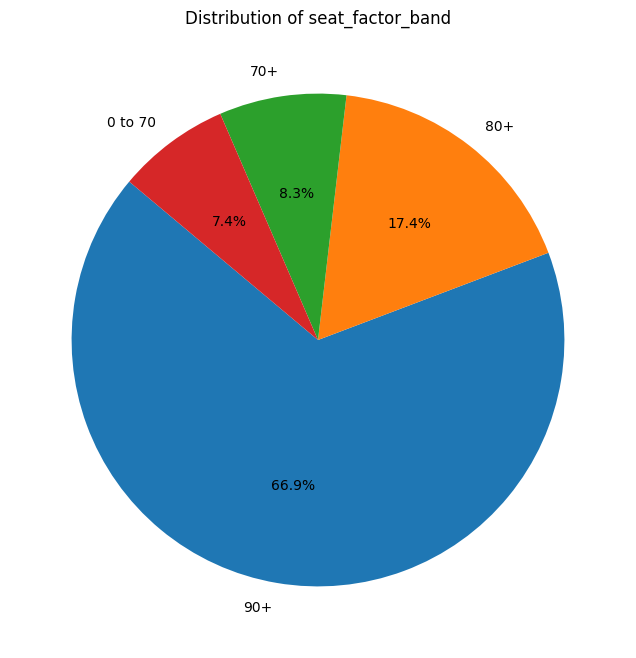

In [27]:
col = 'seat_factor_band'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Loyalty Program Level Distribution

This pie chart shows the distribution of loyalty program levels. Categories contributing less than 5% have been grouped into 'Other'.

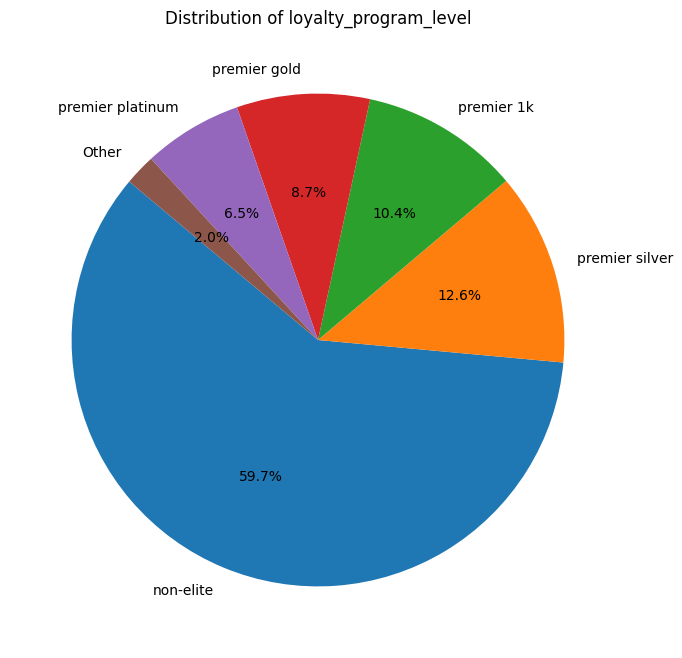

In [28]:
col = 'loyalty_program_level'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Fleet Type Description Distribution

This pie chart shows the distribution of fleet type descriptions. Categories contributing less than 5% have been grouped into 'Other'.

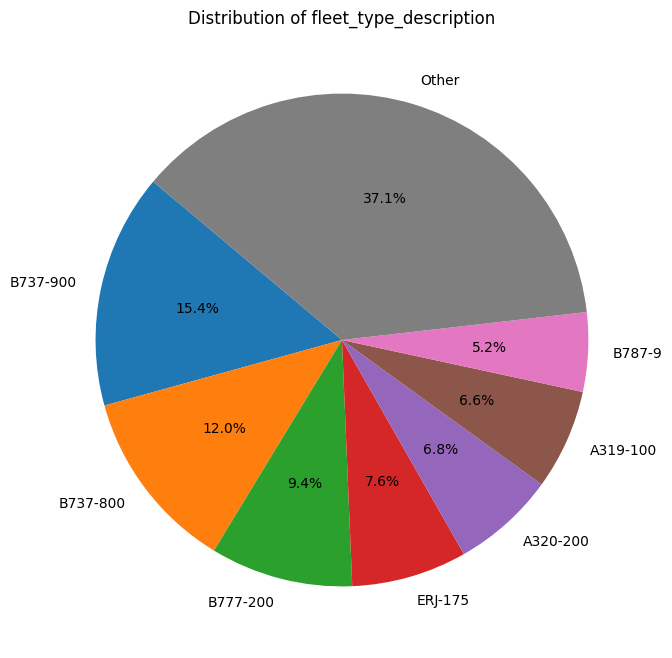

In [29]:
col = 'fleet_type_description'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Fleet Usage Distribution

This pie chart shows the distribution of fleet usage. Categories contributing less than 5% have been grouped into 'Other'.

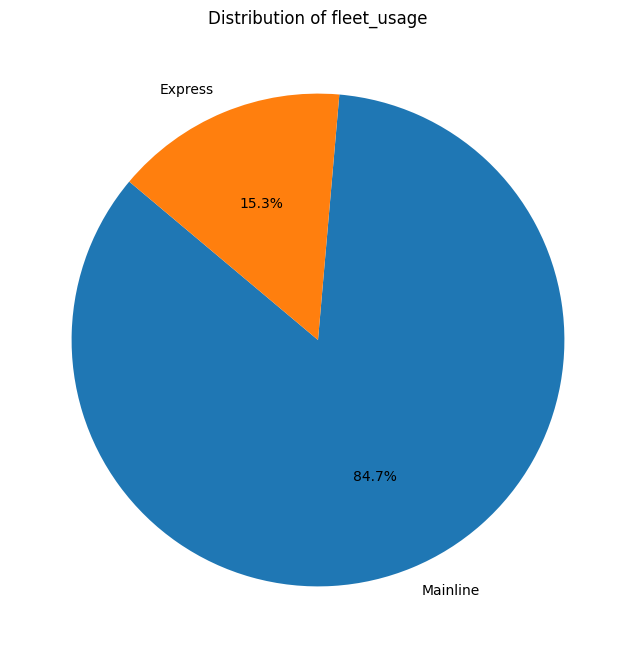

In [30]:
col = 'fleet_usage'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Response Group Distribution

This pie chart shows the distribution of response groups. Categories contributing less than 5% have been grouped into 'Other'.

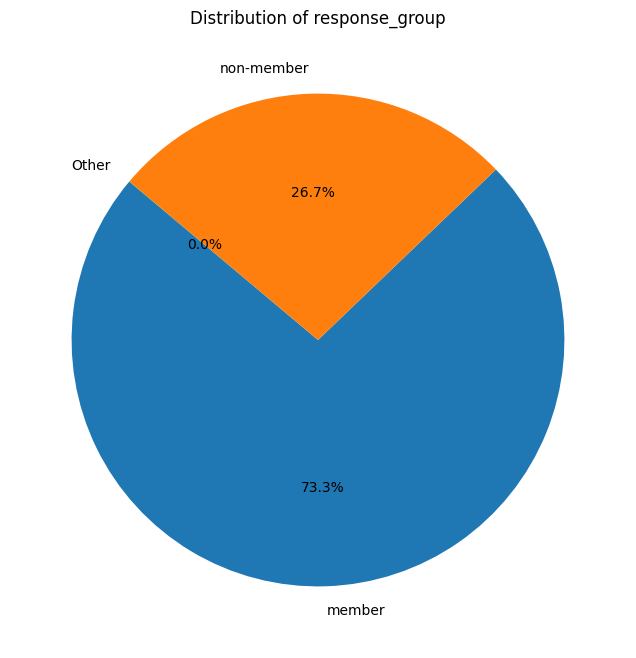

In [31]:
col = 'response_group'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

### Sentiments Distribution

This pie chart shows the distribution of sentiments. Categories contributing less than 5% have been grouped into 'Other'.

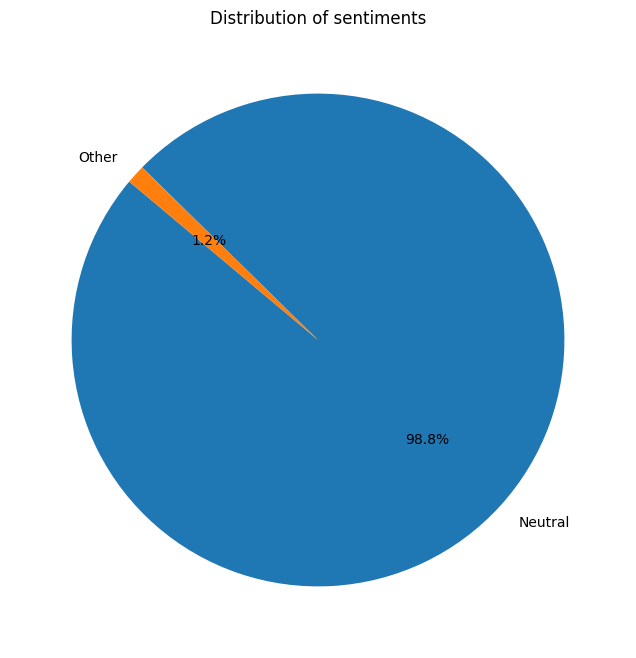

In [32]:
col = 'sentiments'
value_counts = categorical_df[col].value_counts(normalize=True) * 100
other_threshold = 5
other_values = value_counts[value_counts < other_threshold].sum()
main_values = value_counts[value_counts >= other_threshold]

if other_values > 0:
    main_values['Other'] = other_values

plt.figure(figsize=(8, 8))
plt.pie(main_values, labels=main_values.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {col}')
plt.show()

# Data preprocessing

### Label Encoding for 'arrival_delay_group'

To prepare the 'arrival_delay_group' column for numerical analysis, we will apply label encoding ,since we only has two representation in the entire column. The categories will be mapped as follows:

- 'Early & Ontime' will be encoded as **0**
- 'Delayed' will be encoded as **1**

In [33]:
customer_comments_df['arrival_delay_group'] = customer_comments_df['arrival_delay_group'].map({'Early & Ontime': 0, 'Delayed': 1})
display(customer_comments_df[['arrival_delay_group']].head())

,arrival_delay_group
0,0
1,0
2,0
3,0
4,0


### Label Encoding for 'departure_delay_group'

To prepare the 'departure_delay_group' column for numerical analysis, we will apply label encoding,since we only has two representation in the entire column. The categories will be mapped as follows:

- 'Early & Ontime' will be encoded as **0**
- 'Delayed' will be encoded as **1**

In [34]:
customer_comments_df['departure_delay_group'] = customer_comments_df['departure_delay_group'].map({'Early & Ontime': 0, 'Delayed': 1})
display(customer_comments_df[['departure_delay_group']].head())

,departure_delay_group
0,1
1,1
2,0
3,0
4,0


In [35]:
customer_comments_df.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text
0,0,950,LHX,SFX,2022-09-01,0,1,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...
1,1,950,LHX,SFX,2022-09-01,0,1,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic
2,2,1876,FLX,EWX,2022-09-01,0,0,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack
3,3,5469,SFX,SEX,2022-09-01,0,0,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...
4,4,281,DEX,ANX,2022-09-01,0,0,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal


### One-Hot Encoding for 'entity' Column

To prepare the 'entity' column for analysis, we will apply one-hot encoding. This technique is suitable here because 'entity' is a nominal categorical variable (there is no inherent order or ranking between the categories like 'Atlantic', 'Domestic', 'Latin', and 'Pacific').

One-hot encoding will convert this single column into multiple binary columns, one for each unique category. A value of 1 in a new column indicates the presence of that category for a given row, while a 0 indicates its absence. This prevents the model from assuming any ordinal relationship between the categories, which would be incorrect for nominal data.

In [36]:
entity_one_hot = pd.get_dummies(customer_comments_df['entity'], prefix='entity')
customer_comments_df = pd.concat([customer_comments_df, entity_one_hot], axis=1)
display(customer_comments_df.head())

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,...,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,Atlantic,There was no salad dressing. The staff informe...,0 to 70,...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Atlantic,Not a choice.,0 to 70,...,NaN,B777-200,Mainline,non-member,Neutral,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,Domestic,More variety and bigger snacks.,90+,...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Domestic,Serving pretzels and cookies in first class wa...,90+,...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,Domestic,More inflight selections to purchase for full ...,0 to 70,...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal,False,True,False,False


In [37]:
customer_comments_df = customer_comments_df.drop('entity', axis=1)
display(customer_comments_df.head())

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,Neutral,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal,False,True,False,False


### Dropping 'ques_verbatim_text' Column

The 'ques_verbatim_text' column contains the survey question the customer was responding to. Upon inspection, it was found that this column has only one unique value across the entire dataset. Since this column does not provide any varying information, it will not contribute to the model's ability to learn patterns and relationships in the data. Therefore, it is appropriate to drop this column to reduce dimensionality and remove irrelevant features.

In [38]:
customer_comments_df = customer_comments_df.drop('ques_verbatim_text', axis=1)
display(customer_comments_df.head())

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,There was no salad dressing. The staff informe...,0 to 70,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Not a choice.,0 to 70,NaN,B777-200,Mainline,non-member,Neutral,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,More variety and bigger snacks.,90+,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Serving pretzels and cookies in first class wa...,90+,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,More inflight selections to purchase for full ...,0 to 70,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal,False,True,False,False


### Reponse group column handling



#### Handling Outliers in 'response_group'

Upon examining the value counts for the 'response_group' column, it was observed that the category 'NBK' has only one row. This suggests that 'NBK' might be an outlier or represent a data entry error. To avoid potential issues in subsequent analysis or modeling due to this rare category, we will remove the rows where 'response_group' is 'NBK'.

In [39]:
customer_comments_df = customer_comments_df[customer_comments_df['response_group'] != 'NBK']
display(customer_comments_df.head())

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,There was no salad dressing. The staff informe...,0 to 70,non-elite,B777-200,Mainline,member,Neutral,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Not a choice.,0 to 70,NaN,B777-200,Mainline,non-member,Neutral,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,More variety and bigger snacks.,90+,non-elite,A320-200,Mainline,member,Neutral,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Serving pretzels and cookies in first class wa...,90+,premier gold,ERJ-175,Express,member,Neutral,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,More inflight selections to purchase for full ...,0 to 70,non-elite,B737-MAX8,Mainline,member,Neutral,inflight select purchas full meal,False,True,False,False


In [40]:
#checking the reponse group after
col = 'response_group'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: response_group
Value Counts:


response_group
member        6905
non-member    2518
Name: count, dtype: int64

Number of unique values: 2


#### Label Encoding for 'response_group'

To prepare the 'response_group' column for numerical analysis, we will apply label encoding. The categories will be mapped as follows:

- 'member' will be encoded as **1**
- 'non-member' will be encoded as **0**

In [41]:
customer_comments_df['response_group'] = customer_comments_df['response_group'].map({'member': 1, 'non-member': 0})
display(customer_comments_df[['response_group']].head())

,response_group
0,1
1,0
2,1
3,1
4,1


In [42]:
customer_comments_df.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,There was no salad dressing. The staff informe...,0 to 70,non-elite,B777-200,Mainline,1,Neutral,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Not a choice.,0 to 70,NaN,B777-200,Mainline,0,Neutral,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,More variety and bigger snacks.,90+,non-elite,A320-200,Mainline,1,Neutral,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Serving pretzels and cookies in first class wa...,90+,premier gold,ERJ-175,Express,1,Neutral,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,More inflight selections to purchase for full ...,0 to 70,non-elite,B737-MAX8,Mainline,1,Neutral,inflight select purchas full meal,False,True,False,False


### Label Encoding for 'fleet_usage'

To prepare the 'fleet_usage' column for numerical analysis, we will apply label encoding. This column represents whether the aircraft is used for 'Mainline' or 'Express' operations. Since there are only two distinct categories and no inherent order, label encoding is a suitable method to convert these categorical values into numerical representations.

The categories will be mapped as follows:

- 'Mainline' will be encoded as **1**
- 'Express' will be encoded as **0**

In [43]:
customer_comments_df['fleet_usage'] = customer_comments_df['fleet_usage'].map({'Mainline': 1, 'Express': 0})
display(customer_comments_df[['fleet_usage']].head())

,fleet_usage
0,1
1,1
2,1
3,0
4,1


In [44]:
customer_comments_df.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,There was no salad dressing. The staff informe...,0 to 70,non-elite,B777-200,1,1,Neutral,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Not a choice.,0 to 70,NaN,B777-200,1,0,Neutral,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,More variety and bigger snacks.,90+,non-elite,A320-200,1,1,Neutral,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Serving pretzels and cookies in first class wa...,90+,premier gold,ERJ-175,0,1,Neutral,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,More inflight selections to purchase for full ...,0 to 70,non-elite,B737-MAX8,1,1,Neutral,inflight select purchas full meal,False,True,False,False


### Ordinal Encoding for 'seat_factor_band'

To prepare the 'seat_factor_band' column for numerical analysis, we will apply ordinal encoding. This method is suitable because the categories in this column ('0 to 70', '70+', '80+', '90+') have a natural, ordered relationship representing increasing levels of seat occupancy.

We will map the categories to numerical values as follows:

- "0 to 70" will be encoded as **0**
- "70+" will be encoded as **1**
- "80+" will be encoded as **2**
- "90+" will be encoded as **3**

This encoding preserves the order of the categories, which can be beneficial for some machine learning models.

In [45]:
seat_factor_mapping = {"0 to 70": 0, "70+": 1, "80+": 2, "90+": 3}
customer_comments_df['seat_factor_band'] = customer_comments_df['seat_factor_band'].map(seat_factor_mapping)
display(customer_comments_df[['seat_factor_band']].head())

,seat_factor_band
0,0
1,0
2,3
3,3
4,0


In [46]:
customer_comments_df.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,There was no salad dressing. The staff informe...,0,non-elite,B777-200,1,1,Neutral,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Not a choice.,0,NaN,B777-200,1,0,Neutral,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,More variety and bigger snacks.,3,non-elite,A320-200,1,1,Neutral,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Serving pretzels and cookies in first class wa...,3,premier gold,ERJ-175,0,1,Neutral,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,More inflight selections to purchase for full ...,0,non-elite,B737-MAX8,1,1,Neutral,inflight select purchas full meal,False,True,False,False


### handling Sentiment column

#### In this dataset the sentiment are skewed as shown in the cell below

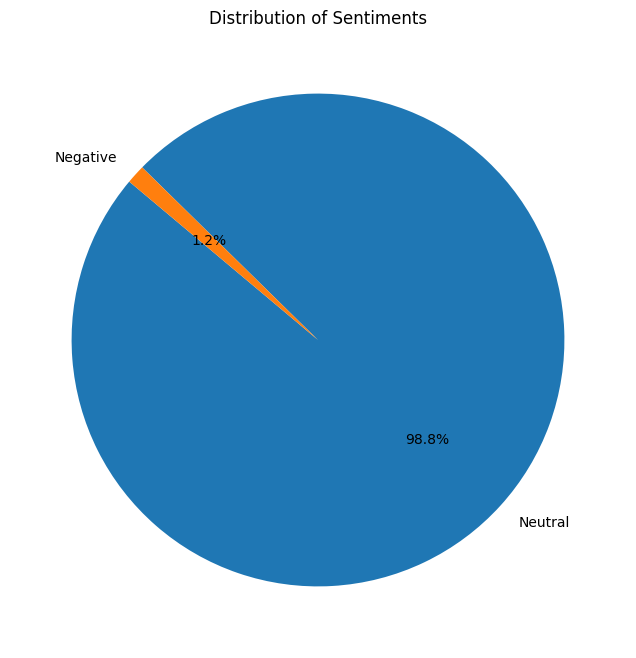

In [47]:
sentiment_counts = categorical_df['sentiments'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.show()

#### Label Encoding for 'sentiments'

To prepare the 'sentiments' column for numerical analysis, we will apply label encoding. This will convert the categorical sentiment labels into numerical values.

The categories will be mapped as follows:

- 'Neutral' will be encoded as **0**
- 'Negative' will be encoded as **1**

In [48]:
customer_comments_df['sentiments'] = customer_comments_df['sentiments'].map({'Neutral': 0, 'Negative': 1})
display(customer_comments_df[['sentiments']].head())

,sentiments
0,0
1,0
2,0
3,0
4,0


In [49]:
customer_comments_df.head()

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,verbatim_text,seat_factor_band,loyalty_program_level,fleet_type_description,fleet_usage,response_group,sentiments,transformed_text,entity_Atlantic,entity_Domestic,entity_Latin,entity_Pacific
0,0,950,LHX,SFX,2022-09-01,0,1,There was no salad dressing. The staff informe...,0,non-elite,B777-200,1,1,0,salad dress staff inform flight receiv salad d...,True,False,False,False
1,1,950,LHX,SFX,2022-09-01,0,1,Not a choice.,0,NaN,B777-200,1,0,0,choic,True,False,False,False
2,2,1876,FLX,EWX,2022-09-01,0,0,More variety and bigger snacks.,3,non-elite,A320-200,1,1,0,varieti bigger snack,False,True,False,False
3,3,5469,SFX,SEX,2022-09-01,0,0,Serving pretzels and cookies in first class wa...,3,premier gold,ERJ-175,0,1,0,serv pretzel cooki first class extrem disappoi...,False,True,False,False
4,4,281,DEX,ANX,2022-09-01,0,0,More inflight selections to purchase for full ...,0,non-elite,B737-MAX8,1,1,0,inflight select purchas full meal,False,True,False,False


## Parsing 'fleet_type_description' using Regular Expressions

### How to Implement: A Step-by-Step Guide

The 'fleet_type_description' column contains valuable information about the aircraft type, but it is currently in a single string format (e.g., 'B737-800', 'A320-200'). To make this information more useful for analysis and modeling, we will parse these codes into more granular features.

### ⚙️ Step 1: Parse the Aircraft Codes (Feature Engineering)

Your goal here is to split a single string like 'B737-800' into meaningful parts. The best tool for this job is Regular Expressions (Regex), which are used for pattern matching in text.

Let's analyze the pattern in your data: B737-900, A320-200, ERJ-175, B737-MAX9.
A common pattern is a manufacturer code (like 'B' or 'A'), followed by a series of numbers representing the aircraft family, and sometimes an optional model identifier (like '-800', '-MAX9').

We can write a function to apply this logic. This function will:

*   Use a regex to capture the parts of the aircraft code.
*   Use a mapping to convert manufacturer codes (like 'B') to full names ('Boeing').
*   Handle cases where a part might be missing (e.g., some codes might not have a specific sub-model).

This approach is considered best practice for parsing structured strings like these aircraft codes because:

*   **Flexibility:** Regex allows us to define precise patterns to extract the desired information, even with variations in the format.
*   **Efficiency:** Regex engines are highly optimized for pattern matching in text.
*   **Scalability:** Once the regex pattern is defined, it can be applied consistently to all rows in the column.
*   **Maintainability:** Using a dedicated function for parsing makes the code cleaner and easier to understand and modify if the data format changes in the future.

In [50]:
print("Value Counts for fleet_type_description:")
display(customer_comments_df['fleet_type_description'].value_counts())

Value Counts for fleet_type_description:


fleet_type_description
B737-900     1451
B737-800     1133
B777-200      882
ERJ-175       713
A320-200      640
A319-100      620
B787-9        490
B777-300      457
B737-MAX9     430
B767-300      386
CRJ-200       315
B737-700      282
B757-200      259
B787-10       257
B787-8        220
B767-400      186
B737-MAX8     181
ERJ-145       135
ERJ-170       126
B757-300      111
CRJ-550        89
CRJ-700        60
Name: count, dtype: int64

In [51]:
import re

def parse_fleet_type(description):
    # Updated regex to capture 1 to 3 uppercase letters for manufacturer, followed by digits for family,
    # and an optional part starting with '-' or containing 'MAX' or other identifiers.
    match = re.match(r'([A-Z]{1,3})(\d+)(-?\w+)?', description)
    if match:
        manufacturer_code, family, model = match.groups()

        # Map manufacturer code to full name
        manufacturer_map = {
            'B': 'Boeing',
            'A': 'Airbus',
            'ERJ': 'Embraer', # Added ERJ
            'CRJ': 'Bombardier' # Added CRJ
            # Add other manufacturers if needed
        }
        # Use the full code if it's a known key, otherwise use the first letter if it's in the map, or the code itself
        manufacturer = manufacturer_map.get(manufacturer_code, manufacturer_map.get(manufacturer_code[0], manufacturer_code))


        # Clean up the model string
        if model:
            model = model.lstrip('-') # Remove leading hyphen
        else:
            model = None # Set to None if no model part

        return manufacturer, family, model
    else:
        # Attempt to handle cases like 'ERJ-175' or 'CRJ-200' that might not fit the first regex
        # This accounts for cases where the family might be part of the initial code if the regex fails
        match_alt = re.match(r'([A-Z]{1,3})-?(\w+)?', description)
        if match_alt:
            manufacturer_code, model = match_alt.groups()
            manufacturer_map = {
                'B': 'Boeing',
                'A': 'Airbus',
                'ERJ': 'Embraer', # Added ERJ
                'CRJ': 'Bombardier' # Added CRJ
                # Add other manufacturers if needed
            }
            manufacturer = manufacturer_map.get(manufacturer_code, manufacturer_map.get(manufacturer_code[0], manufacturer_code))

            # If the first regex failed but the alternate matched, the 'model' in match_alt is likely the family
            family = model # Assign the matched 'model' as the family in this case
            model = None # Set model to None as it wasn't captured separately

            return manufacturer, family, model
        else:
             return None, None, None # Return None for all parts if no match


# Apply the function to the 'fleet_type_description' column
customer_comments_df[['manufacturer', 'fleet_family', 'fleet_model']] = customer_comments_df['fleet_type_description'].apply(lambda x: pd.Series(parse_fleet_type(x)))

# Display the new columns along with the original
display(customer_comments_df[['fleet_type_description', 'manufacturer', 'fleet_family', 'fleet_model']].head())

,fleet_type_description,manufacturer,fleet_family,fleet_model
0,B777-200,Boeing,777,200
1,B777-200,Boeing,777,200
2,A320-200,Airbus,320,200
3,ERJ-175,Embraer,175,None
4,B737-MAX8,Boeing,737,MAX8


In [52]:
col = 'manufacturer'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: manufacturer
Value Counts:


manufacturer
Boeing        6725
Airbus        1260
Embraer        974
Bombardier     464
Name: count, dtype: int64

Number of unique values: 4


In [53]:
col = 'fleet_family'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: fleet_family
Value Counts:


fleet_family
737    3477
777    1339
787     967
175     713
320     640
319     620
767     572
757     370
200     315
145     135
170     126
550      89
700      60
Name: count, dtype: int64

Number of unique values: 13


In [54]:
col = 'fleet_model'
print(f"\nColumn: {col}")
print("Value Counts:")
display(customer_comments_df[col].value_counts())
print(f"Number of unique values: {customer_comments_df[col].nunique()}")


Column: fleet_model
Value Counts:


fleet_model
200     1781
900     1451
800     1133
300      954
100      620
9        490
MAX9     430
700      282
10       257
8        220
400      186
MAX8     181
Name: count, dtype: int64

Number of unique values: 12


# what is left
  - handling the fleet type destination
  - handling the airport station codes
  - the text and transformed text it should be dropeed since it is not useful since it has already been used in capturing the sentiment from the text
  - the loyalty program column is screwed and will potentially be removed